<a href="https://colab.research.google.com/github/saafiray/Study/blob/main/IDMaternalMortalityRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup Library**

In [ ]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Setting max rows
pd.set_option('display.max_rows', None)



---



Kita akan menganalisis MMR masing-masing provinsi di Indonesia pada tahun 2020. Tujuannya adalah untuk mengetahui MMR pada tiap-tiap provinsi dan pulau. Hasil dari analisis ini juga dapat digunakan untuk mengetahui provinsi mana yang perlu mendapatkan perhatian lebih pada fasilitas kesehatan.

Dataset yang digunakan
CBR : https://www.bps.go.id/id/statistics-table/1/MjIxMyMx/angka-kelahiran-kasar--crude-birth-rate--hasil-long-form-sp2020-menurut-provinsi-kabupaten-kota--2020.html

populasi 2020 : https://sulut.bps.go.id/id/statistics-table/2/OTU4IzI=/jumlah-penduduk-menurut-provinsi-diindonesia.html

MMR : https://www.bps.go.id/id/statistics-table/1/MjIxOSMx/angka-kematian-ibu-aki--maternal-mortality-rate-mmr---hasil-long-form-sp2020-menurut-provinsi--2020.html

dataset yang digunakan pada notebook ini adalah dataset csv yang berasal dari sumber tersebut yang telah disesuaikan untuk kepentingan pengolahan data.



---



Persiapan data

In [ ]:
## LOAD DATA
data_mmr = pd.read_csv('/content/mmr2020.csv', index_col=0)

In [ ]:
# LOAD DATA CBR DAN POPULASI
data_cbr = pd.read_csv('/content/cbr2020.csv', index_col=0)
data_populasi2020 = pd.read_csv('/content/datapenduduk201820192020.csv', index_col=0)

In [ ]:
# MERGE DATA
data = pd.merge(data_mmr, data_cbr, on='Provinsi', how='inner') # MERGE DENGAN CBR
data = pd.merge(data, data_populasi2020, on='Provinsi', how='inner') # MERGE DENGAN POPULASI 2020

In [ ]:
# MELIHAT KOLOM YANG ADA PADA DATA
data.columns

Index(['Provinsi', 'MMR', 'Angka Kelahiran Kasar', '2018', '2019', '2020'], dtype='object')

In [ ]:
# MELIHAT TIPE DATA KOLOM
data.dtypes

,0
Provinsi,object
MMR,int64
Angka Kelahiran Kasar,object
2018,float64
2019,float64
2020,float64


In [ ]:
# MENGUBAH NAMA KOLOM Angka Kelahiran Kasar MENJADI CBR
data.rename(columns={'Angka Kelahiran Kasar': 'CBR'}, inplace=True)

In [ ]:
# MENGUBAH TIPE DATA KOLOM CBR MENJADI FLOAT
data['CBR'] = data['CBR'].replace(',', '.', regex=True).astype(float)

In [ ]:
# DROP KOLOM 2018 dan 2019 karena kita hanya butuh populasi pada tahun 2020
data.drop(columns=['2018', '2019'], inplace=True)

In [ ]:
# DATA YANG ADA DI KOLOM 2020 ADALAH POPULASI PERSERIBU, UBAH KE PERSATU
data['2020'] = data['2020'] * 1000



---



$
\text{Jumlah Kelahiran Hidup} =  \frac{\text{CBR} \times \text{Jumlah Penduduk}}{1,000}
$

In [ ]:
# MENAMBAHKAN KOLOM JUMLAH KELAHIRAN HIDUP
data['Jumlah Kelahiran Hidup'] = (data['CBR'] * data['2020']) / 1000

$ \text{Jumlah Kematian Ibu} = \left( \frac{MMR}{100,000} \right) \times \text{Jumlah Kelahiran Hidup}$

In [ ]:
# MENAMBAHKAN KOLOM JUMLAH KEMATIAN IBU
data['Jumlah Kematian Ibu'] = (data['MMR'] / 100000) * data['Jumlah Kelahiran Hidup']



---



In [ ]:
# Kolom data
data.columns

Index(['Provinsi', 'MMR', 'CBR', '2020', 'Jumlah Kelahiran Hidup',
       'Jumlah Kematian Ibu'],
      dtype='object')

In [ ]:
data['Provinsi']

,Provinsi
0,ACEH
1,SUMATERA UTARA
2,SUMATERA BARAT
3,RIAU
4,JAMBI
5,SUMATERA SELATAN
6,BENGKULU
7,LAMPUNG
8,KEPULAUAN BANGKA BELITUNG
9,KEPULAUAN RIAU



**Terlihat bahwa terdapat 35 baris pada kolom Provinsi. Pada tahun 34, Indonesia hanya memiliki 34 provinsi. 1 baris lainnya adalah MMR untuk Indonesia secara keseluruhan.**

In [ ]:
## PISAHKAN DATA MASING MASING PROVINSI DENGAN KESELURUHAN INDONESIA
data_provinsi = data.iloc[:-1]
data_indonesia = data.iloc[-1:]

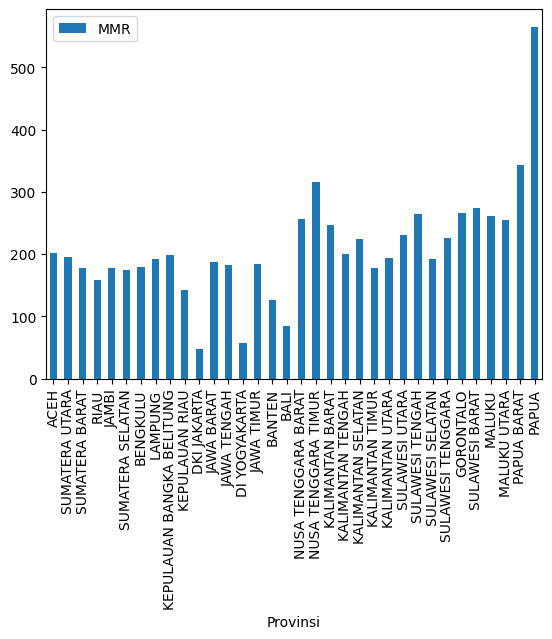

In [ ]:
# MENUNJUKAN BAR PLOT
plt.show(data_provinsi.plot(x='Provinsi', y='MMR', kind='bar'))

**Terlihat sekilas bahwa Papua adalah provinsi dengan MMR tertinggi**

Text(0.5, 0, 'MMR')

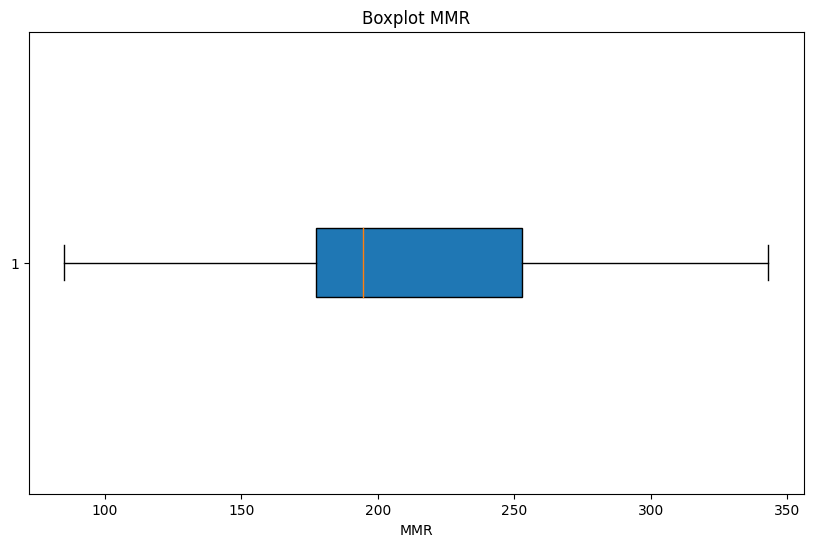

In [ ]:
# MENAMPILKAN BOXPLOT
plt.figure(figsize=(10, 6))
plt.boxplot(data_provinsi['MMR'], vert=False, patch_artist=True, showfliers=False)

plt.title('Boxplot MMR')
plt.xlabel('MMR')

Terlepas signifikannya MMR pada Provinsi Papua, data MMR provinsi tidak memiliki outlier bedasarkan Boxplot di atas. Hal ini menunjukan bahwa distribusi data MMR provinsi homogen.

In [ ]:
# KLASTERISASI DATA PROVINSI BEDASARKAN PULAU
data_sumatera = data_provinsi[:10]
data_jawa = data_provinsi[10:16]
data_kepulauan_sunda_kecil = data_provinsi[16:19]
data_kalimantan = data_provinsi[19:24]
data_sulawesi = data_provinsi[24:30]
data_maluku = data_provinsi[30:32]
data_papua = data_provinsi[32:]

###MMR PULAU SUMATERA

<Axes: ylabel='Provinsi'>

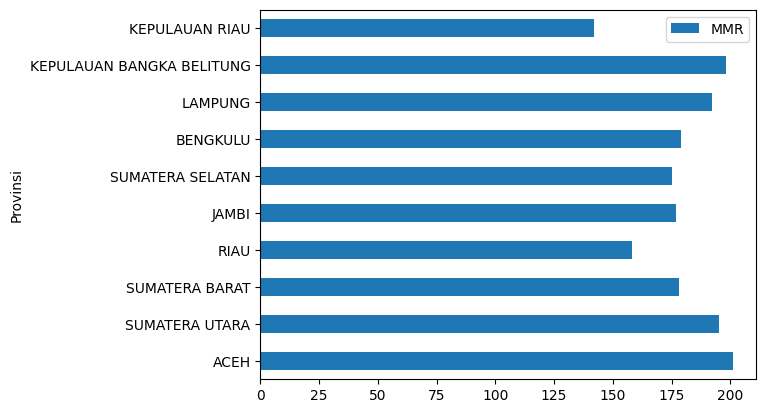

In [ ]:
data_sumatera.plot(x='Provinsi', y='MMR', kind='barh')

Terlihat bahwa MMR tertinggi terdapat pada provinsi Aceh dan Kep. Bangka Belitung

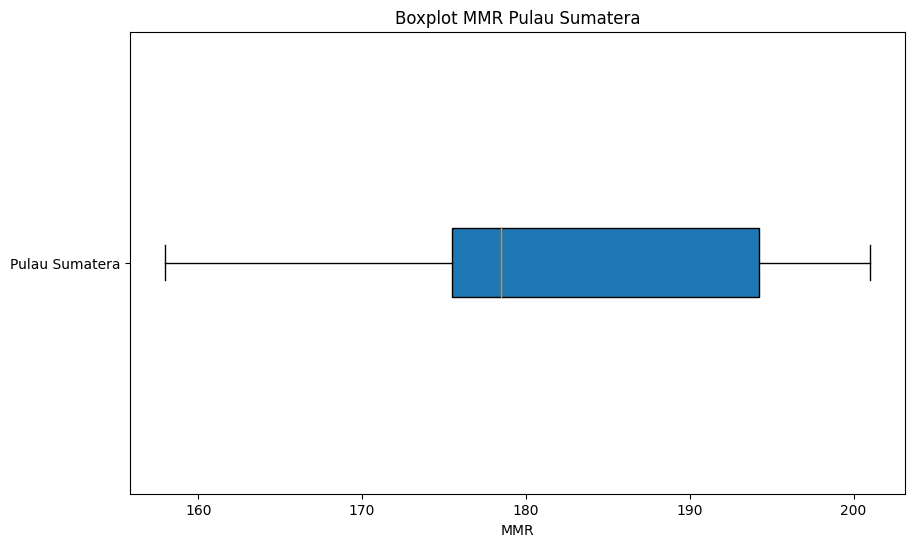

In [ ]:
# MENAMPILKAN BOXPLOT
plt.figure(figsize=(10, 6))
plt.boxplot(data_sumatera['MMR'], vert=False, patch_artist=True, showfliers=False)

plt.title('Boxplot MMR Pulau Sumatera')
plt.xlabel('MMR')
plt.yticks([1], ['Pulau Sumatera'])
plt.show()

**Bedasarkan Boxplot, terlihat bahwa tidak terdapat outlier pada data. Hal ini membuktikan bahwa masing-masing provinsi pada pulau sumatera memiliki distribusi data MMR yang relatif homogen**

In [ ]:
# MENGHITUNG MMR UNTUK PULAU SUMATERA
MMR_SUMATERA = data_sumatera['Jumlah Kematian Ibu'].sum()/data_sumatera['Jumlah Kelahiran Hidup'].sum() * 100000

###MMR PULAU JAWA

<Axes: ylabel='Provinsi'>

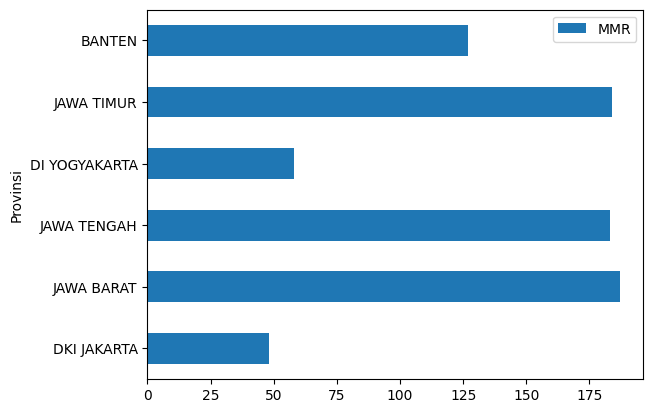

In [ ]:
data_jawa.plot(x='Provinsi', y='MMR', kind='barh')

Terlihat bahwa MMR tertinggi terdapat pada provinsi Jawa Barat

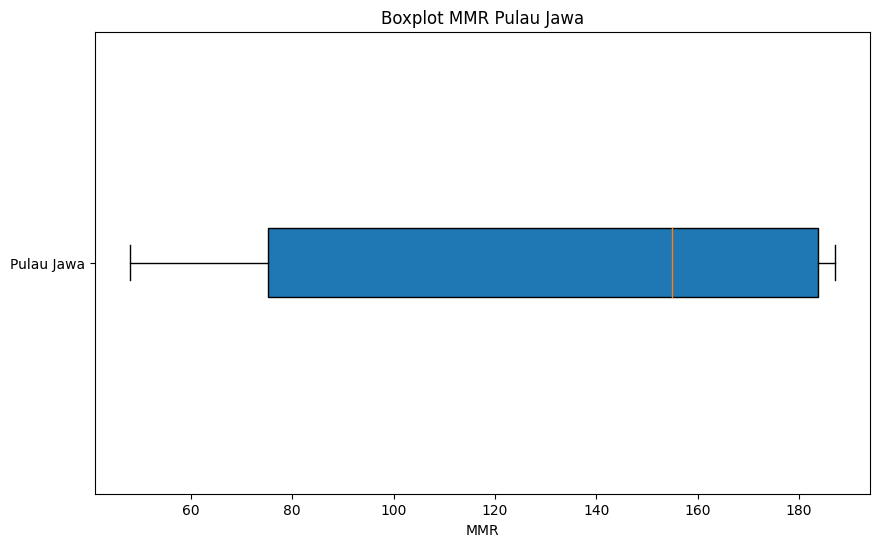

In [ ]:
# MENAMPILKAN BOXPLOT
plt.figure(figsize=(10, 6))
plt.boxplot(data_jawa['MMR'], vert=False, patch_artist=True, showfliers=False)

plt.title('Boxplot MMR Pulau Jawa')
plt.xlabel('MMR')
plt.yticks([1], ['Pulau Jawa'])
plt.show()

**Bedasarkan Boxplot, terlihat bahwa tidak terdapat outlier pada data. Hal ini membuktikan bahwa masing-masing provinsi pada pulau Jawa memiliki distribusi data MMR yang relatif homogen**

In [ ]:
# MENGHITUNG MMR UNTUK PULAU JAWA
MMR_JAWA = data_jawa['Jumlah Kematian Ibu'].sum()/data_jawa['Jumlah Kelahiran Hidup'].sum() * 100000

###MMR KEPULAUAN SUNDA KECIL

<Axes: ylabel='Provinsi'>

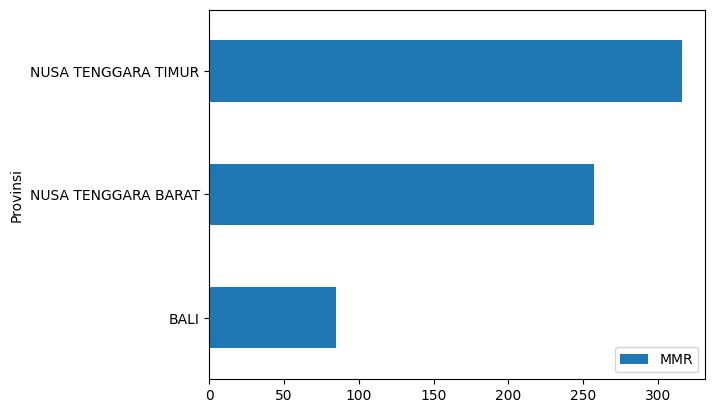

In [ ]:
data_kepulauan_sunda_kecil.plot(x='Provinsi', y='MMR', kind='barh')

Terlihat bahwa MMR tertinggi terdapat pada provinsi Nusa Tenggara Timur

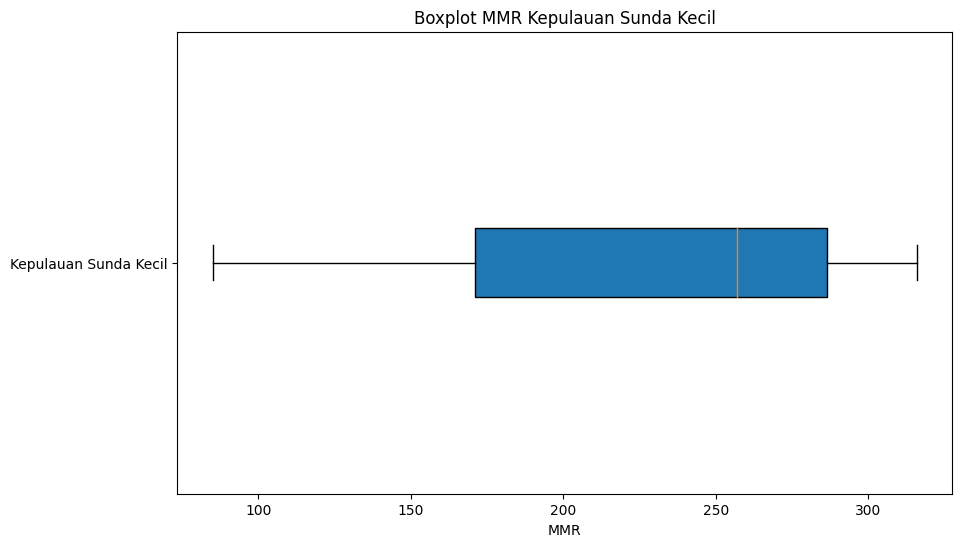

In [ ]:
# MENAMPILKAN BOXPLOT
plt.figure(figsize=(10, 6))
plt.boxplot(data_kepulauan_sunda_kecil['MMR'], vert=False, patch_artist=True, showfliers=False)

plt.title('Boxplot MMR Kepulauan Sunda Kecil')
plt.xlabel('MMR')
plt.yticks([1], ['Kepulauan Sunda Kecil'])
plt.show()

**Bedasarkan Boxplot, terlihat bahwa tidak terdapat outlier pada data. Hal ini membuktikan bahwa masing-masing provinsi pada Kepulauan Sunda Kecil memiliki distribusi data MMR yang relatif homogen**

In [ ]:
# MENGHITUNG MMR UNTUK KEPULAUAN SUNDA KECIL
MMR_KEPULAUAN_SUNDA_KECIL = data_kepulauan_sunda_kecil['Jumlah Kematian Ibu'].sum()/data_kepulauan_sunda_kecil['Jumlah Kelahiran Hidup'].sum() * 100000
MMR_KEPULAUAN_SUNDA_KECIL

242.4130565762691

###MMR KEPULAUAN KALIMANTAN

<Axes: ylabel='Provinsi'>

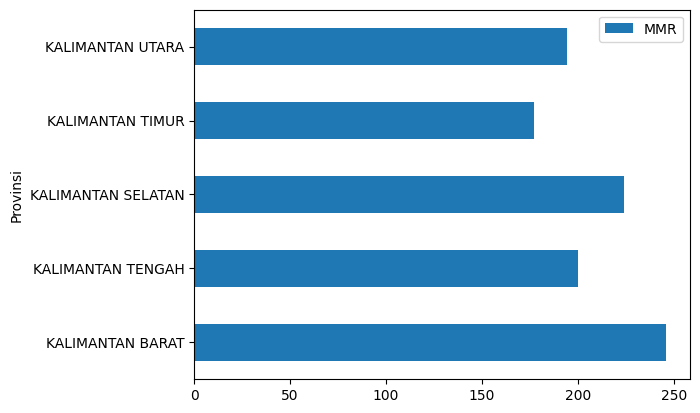

In [ ]:
data_kalimantan.plot(x='Provinsi', y='MMR', kind='barh')

Terlihat bahwa MMR tertinggi terdapat pada provinsi Kalimantan Barat

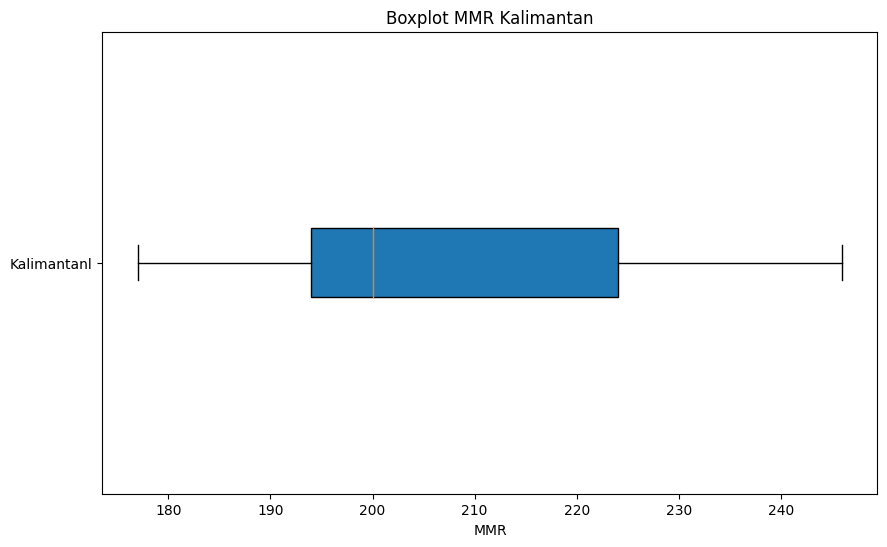

In [ ]:
# MENAMPILKAN BOXPLOT
plt.figure(figsize=(10, 6))
plt.boxplot(data_kalimantan['MMR'], vert=False, patch_artist=True, showfliers=False)

plt.title('Boxplot MMR Kalimantan')
plt.xlabel('MMR')
plt.yticks([1], ['Kalimantanl'])
plt.show()

**Bedasarkan Boxplot, terlihat bahwa tidak terdapat outlier pada data. Hal ini membuktikan bahwa masing-masing provinsi pada pulau Kalimantan memiliki distribusi data MMR yang relatif homogen**

In [ ]:
# MENGHITUNG MMR UNTUK KEPULAUAN KALIMANTAN
MMR_KALIMANTAN = data_kalimantan['Jumlah Kematian Ibu'].sum()/data_kalimantan['Jumlah Kelahiran Hidup'].sum() * 100000
MMR_KALIMANTAN

215.64362486627243

###MMR PULAU SULAWESI

<Axes: ylabel='Provinsi'>

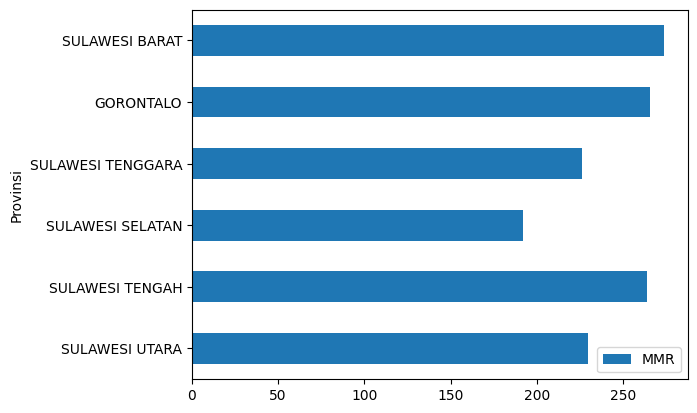

In [ ]:
data_sulawesi.plot(x='Provinsi', y='MMR', kind='barh')

Terlihat bahwa MMR tertinggi terdapat pada provinsi Sulawesi Barat

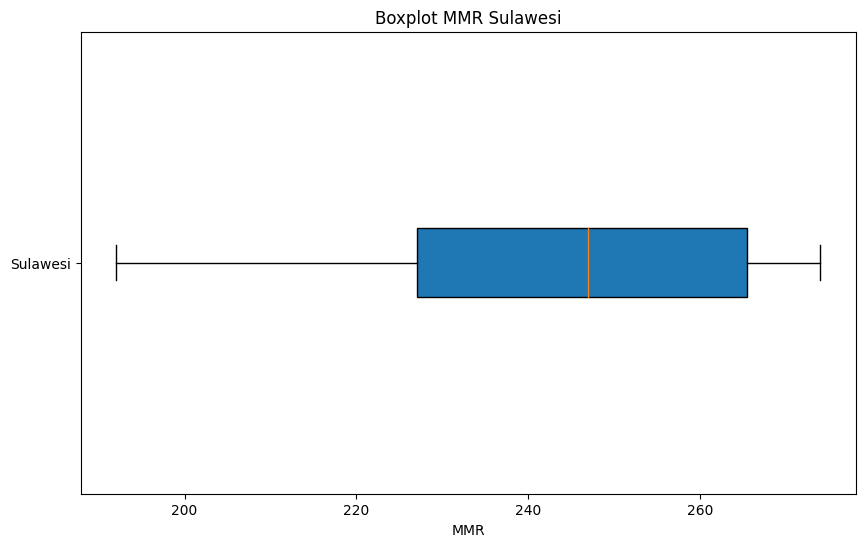

In [ ]:
# MENAMPILKAN BOXPLOT
plt.figure(figsize=(10, 6))
plt.boxplot(data_sulawesi['MMR'], vert=False, patch_artist=True, showfliers=False)

plt.title('Boxplot MMR Sulawesi')
plt.xlabel('MMR')
plt.yticks([1], ['Sulawesi'])
plt.show()

**Bedasarkan Boxplot, terlihat bahwa tidak terdapat outlier pada data. Hal ini membuktikan bahwa masing-masing provinsi pada pulau Sulawesi memiliki distribusi data MMR yang relatif homogen**

In [ ]:
# MENGHITUNG MMR UNTUK KEPULAUAN SULAWESI
MMR_KEPULAUAN_SULAWESI = data_sulawesi['Jumlah Kematian Ibu'].sum()/data_sulawesi['Jumlah Kelahiran Hidup'].sum() * 100000
MMR_KEPULAUAN_SULAWESI

223.5009751235265

###MMR KEPULAUAN MALUKU

<Axes: ylabel='Provinsi'>

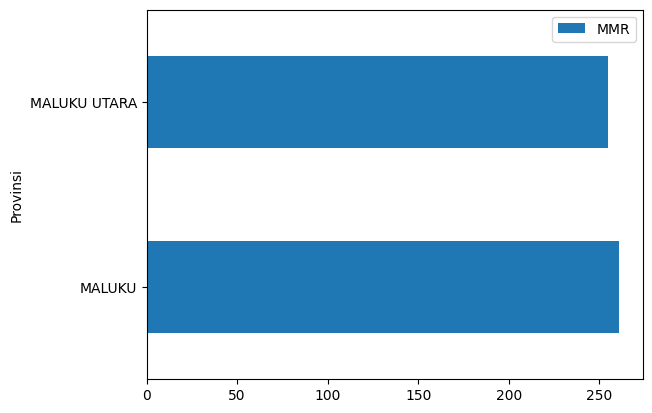

In [ ]:
data_maluku.plot(x='Provinsi', y='MMR', kind='barh')

Terlihat bahwa MMR tertinggi terdapat pada provinsi Maluku

**Tidak perlu boxplot karena hanya ada 2 data pada Pulau Maluku sehingga tidak mungkin outlier ada**

In [ ]:
# MENGHITUNG MMR UNTUK KEPULAUAN MALUKU
MMR_KEPULAUAN_MALUKU = data_maluku['Jumlah Kematian Ibu'].sum()/data_maluku['Jumlah Kelahiran Hidup'].sum() * 100000
MMR_KEPULAUAN_MALUKU

258.56267939257964

###MMR PULAU PAPUA

<Axes: ylabel='Provinsi'>

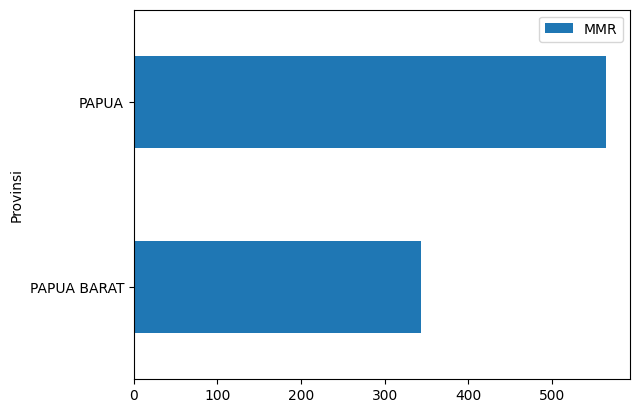

In [ ]:
data_papua.plot(x='Provinsi', y='MMR', kind='barh')

Terlihat bahwa MMR tertinggi terdapat pada Provinsi Papua

**Tidak perlu boxplot karena hanya ada 2 data pada Pulau Papua sehingga tidak mungkin outlier ada**

In [ ]:
# MENGHITUNG MMR UNTUK PULAU PAPUA
MMR_PAPUA = data_papua['Jumlah Kematian Ibu'].sum()/data_papua['Jumlah Kelahiran Hidup'].sum() * 100000
MMR_PAPUA

517.0899965560192

<Axes: ylabel='Provinsi'>

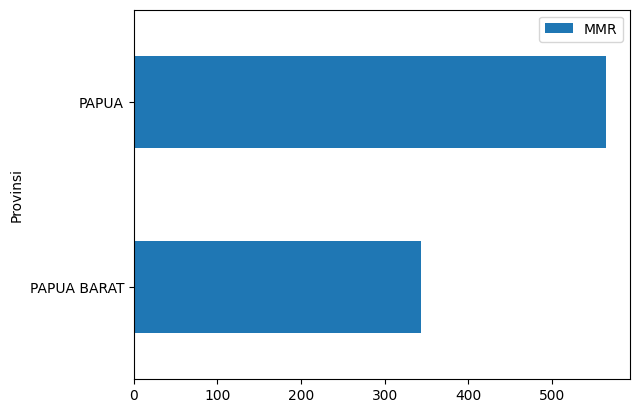

In [ ]:
data_papua.plot(x='Provinsi', y='MMR', kind='barh')

Terlihat bahwa MMR tertinggi terdapat pada Provinsi Papua

**Tidak perlu boxplot karena hanya ada 2 data pada Pulau Papua sehingga tidak mungkin outlier ada**

In [ ]:
# MENGHITUNG MMR UNTUK PULAU PAPUA
MMR_PAPUA = data_papua['Jumlah Kematian Ibu'].sum()/data_papua['Jumlah Kelahiran Hidup'].sum() * 100000
MMR_PAPUA

517.0899965560192

###MMR masing-masing pulau bedasarkan kalkulasi sebelumnya

In [ ]:
# Membuat tabel baru untuk MMR masing-masing pulau
data_mmr_pulau = pd.DataFrame({'Pulau':['Jawa', 'Sumatera','Kepulauan Sunda Kecil','Kalimantan','Sulawesi','Maluku','Papua'] ,
                                'MMR': [MMR_JAWA,MMR_SUMATERA,MMR_KEPULAUAN_SUNDA_KECIL,MMR_KALIMANTAN,MMR_KEPULAUAN_SULAWESI,MMR_KEPULAUAN_MALUKU,MMR_PAPUA]})

In [ ]:
data_mmr_pulau

,Pulau,MMR
0,Jawa,169.153108
1,Sumatera,183.322134
2,Kepulauan Sunda Kecil,242.413057
3,Kalimantan,215.643625
4,Sulawesi,223.500975
5,Maluku,258.562679
6,Papua,517.089997


<Axes: ylabel='Pulau'>

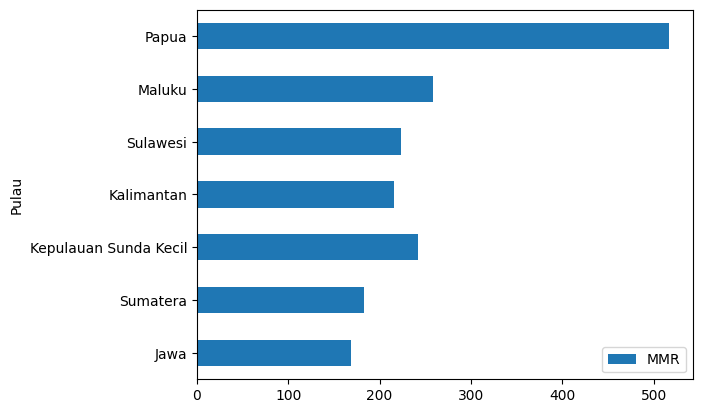

In [ ]:
# MENAMPILKAN BARPLOT UNTUK MMR PULAU
data_mmr_pulau.plot(x='Pulau', y='MMR', kind='barh')

Terlihat bahwa pulau Papua memiliki MMR tertinggi

###Kesimpulan

Terlihat bahwa Pulau dengan MMR tertinggi adalah Pulau Papua dan Provinsi dengan MMR tertinggi adalah Papua. Dari sini kita dapat mengambil kesimpulan bahwa Pulau Papua perlu perhatian lebih untuk ditingkatkan fasilitas kesehatannya.